### Jayce Holdsambeck

### CSCI 477/577: Homework 1
Due 02/23/2023

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#### Problem 1: Comparing the motion of two objects (Gould 3.11)

In [2]:
class ParticleMotion2DWithDrag:
    # Do you need other keyword arguments here?
    def __init__(self,g=-9.81, c=1.0, m=1.0, v_square=True):
        self.n_dof = 4
        self.g = -9.81
        self.c = c
        self.m = m
        self.v_square=v_square
    
    def rhs(self,t,u):
        dudt = np.zeros(self.n_dof)
        dudt[0] = u[1]
        dudt[2] = u[3]
        if self.v_square:
            dudt[1] = -self.c*np.linalg.norm(u[1]+u[3])*(1/self.m)*u[1]
            dudt[3] = self.g-self.c*np.linalg.norm(u[1]+u[3])*(1/self.m)*u[3]
        elif self.v_square == False:
            dudt[1] = -self.c*np.sqrt(np.linalg.norm(u[1]+u[3]))*(1/self.m)*u[1]
            dudt[3] = self.g-self.c*np.sqrt(np.linalg.norm(u[1]+u[3]))*(1/self.m)*u[3]
        return dudt

In [3]:
class Integrator:
    def __init__(self, ode, method):
        # initializing the ode and the method to compute the ode
        self.ode = ode
        self.method = method

    def integrate(self, interval, dt, u_0):
        # assigning the time intervals from the array gievn
        t_0 = interval[0]
        t_end = interval[1]

        # initialize storage of the times and the different states that the
        # with the starting input of position, velocity and start time
        times = [t_0]
        states = [u_0]

        # loop through and iteratively compute each step in computing the estimates
        # based on the method used
        # store both the time steps and the position and velocity of each step
        t = t_0
        while t < t_end:
            dt_ = min(dt, t_end - t)
            u_1 = self.method.step(self.ode, t, dt_, u_0)
            t = t + dt_
            u_0 = u_1

            times.append(t)
            states.append(u_1)

        return np.array(times), np.array(states)

In [4]:
class Euler:
    def __init__(self):
        pass   
    
    def step(self,ode,t,dt,u_0):
        u_1 = u_0 + dt*ode.rhs(t,u_0)
        return u_1

Consider the motion of two identical objects that both start from a height h. One object is dropped
vertically from rest and the other is thrown with a horizontal velocity v0,x. Which object reaches the ground
first?

1. Give reasons for your answer assuming that air resistance can be neglected.

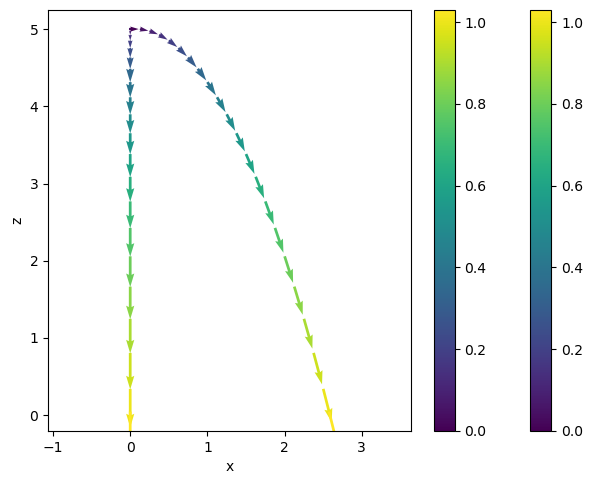

In [5]:
pm = ParticleMotion2DWithDrag(c=0.0)
method = Euler()
integrator = Integrator(pm, method)

fig, ax = plt.subplots()


u_s = [np.array([0.0, 0.0, 5.0, 0.0]), np.array([0.0, 2.5, 5.0, 0.0])]

fig.tight_layout()

for i in range(len(u_s)):
    t_0 = 0.0
    t_end = 1.03
    dt = 0.05
    t, u = integrator.integrate([t_0, t_end], dt, u_s[i])

    c = ax.quiver(u[:, 0], u[:, 2], u[:, 1], u[:, 3], t)
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    plt.colorbar(c)
    plt.axis("equal")

2. Assume that air resistance cannot be neglected and that the drag force is proportional to |v|^2. Give reasons for your anticipated answer for this case. Then perform numerical simulations using, for example, c_d/m = 0.1, h = 10m, and v_0,x = 30 m/s. Are your qualitative results consistent with your anticipated answer?

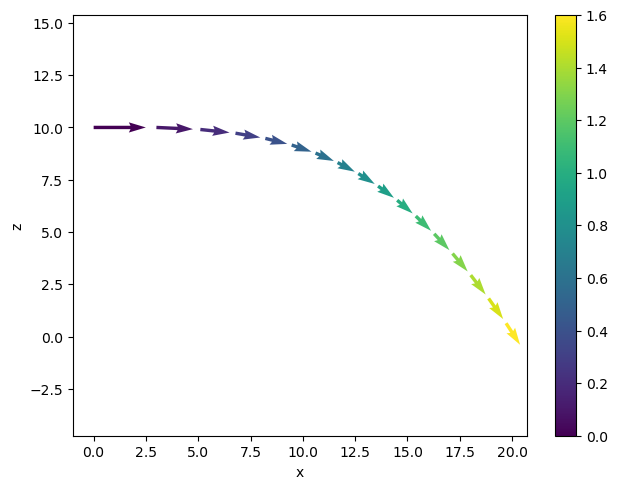

In [6]:
pm = ParticleMotion2DWithDrag(c=1.0, m=10.0)
method = Euler()
integrator = Integrator(pm, method)

fig, ax = plt.subplots()


u_0=np.array([0.0, 30.0, 10.0, 0.0])

fig.tight_layout()


t_0 = 0.0
t_end = 1.6
dt = 0.1
t, u = integrator.integrate([t_0, t_end], dt, u_0)

c = ax.quiver(u[:, 0], u[:, 2], u[:, 1], u[:, 3], t)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.colorbar(c)
plt.axis("equal")
plt.show()

3. Suppose that the drag force is proportional to |v| rather than to |v|^2. Is your anticipated answer similar to that in part (b)? Do a numerical simulation to test your intuition.

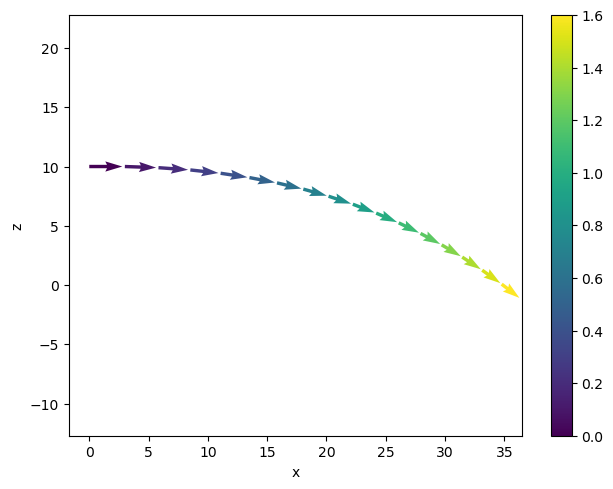

In [7]:
pm = ParticleMotion2DWithDrag(c=1.0, m=10.0, v_square=False)
method = Euler()
integrator = Integrator(pm, method)

fig, ax = plt.subplots()


u_0=np.array([0.0, 30.0, 10.0, 0.0])

fig.tight_layout()


t_0 = 0.0
t_end = 1.6
dt = 0.1
t, u = integrator.integrate([t_0, t_end], dt, u_0)

c = ax.quiver(u[:, 0], u[:, 2], u[:, 1], u[:, 3], t)
ax.set_xlabel("x")
ax.set_ylabel("y")
plt.colorbar(c)
plt.axis("equal")
plt.show()

#### Problem 2: Conservation of energy

Consider the problem of a simple harmonic oscillator, which obeys the equation
<!-- latex dv/dt = -x -->
$$
\begin{equation}
\frac{dv}{dt} = -x
\end{equation}
$$
$$
\begin{equation}
\frac{dx}{dt} = v
\end{equation}
$$
with initial conditions $x_{0}$ = 1 and $v_{0}$ = 0. The total energy of this system is given by
<!-- latex E = 1/2v^2 + 1/2x^2 -->
$$
\begin{equation}
E = \frac{1}{2}v^2 + \frac{1}{2}x^2
\end{equation}
$$
with a true value of $E = \frac{1}{2}$.

Show using a numerical simulation of the above equations that after a single time step, the energy for both the Euler and Euler-Cromer scheme changes proportionally to  For example, you could make a log-log plot of the energy error |E1 −12| for both schemes and evaluate the slope of the resulting line.

1. Show that the energy error for the Euler-Cromer scheme is proportional to $\Delta t^2$ by making a log-log plot of the energy error $|E_{1} −\frac{1}{2}|$ versus $\Delta t$ and evaluating the slope of the resulting line.

In [8]:
class Energy:

    def __init__(self):
        pass

    def rhs(self, t,u):
        u_1 = np.zeros(2)

        u_1[0] = u[1]
        u_1[1] = -u[0]

        return u_1
class Euler:

    def __init__(self):
        pass

    def step (self, ode,t, dt, u_0):

        u_1 = u_0 + dt*ode.rhs (t, u_0)

        E = 0.5*((u_1[0])**2)+0.5*((u_1[1])**2)

        return u_1, E

In [9]:
class Cromer:
    def __init__(self):
        pass   
    
    def step(self, ode, t, dt, u_0):
        u_x = u_0 + ode.rhs(t, u_0)*dt
        u_new = np.zeros_like(u_0)
        u_new[1::2] = u_x[1::2]
        u_new[::2] = u_0[::2]

        u_1 = u_0 + ode.rhs(t, u_new)*dt
        E = 0.5*((u_1[0])**2)+0.5*((u_1[1])**2)
        return u_1, E

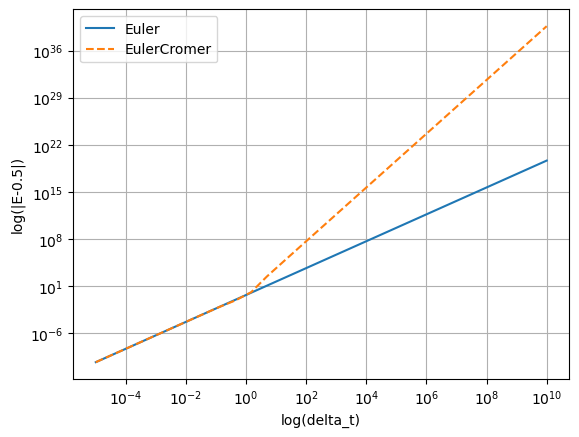

In [10]:
times = np.logspace(-5,10,30)

eu = Euler()
cr = Cromer()
e = Energy()
u_0 = [1.0, 0.0]

E_euler = []
E_cromer = []

for dt in times:
    _,energy = eu.step(e, 1.0, dt, u_0)
    E_euler.append(np.abs(energy-0.5))
    _, energy = cr.step(e, 1.0, dt, u_0)
    E_cromer.append(np.abs(energy-0.5))

E_euler = np.array(E_euler)
E_cromer = np.array(E_cromer)

plt.loglog(times, E_euler, label='Euler')
plt.loglog(times, E_cromer, '--', label='EulerCromer')
plt.xlabel('log(delta_t)')
plt.ylabel('log(|E-0.5|)')
plt.grid(True)
plt.legend()
plt.show()


2. Do the same analysis but for the average error over a single period of the oscillator, which for this problem is $T = 2π$ (i.e. integrate the equations from $t = 0$ to $t = T$ and compute the same energy error metric as before, but averaged over all time steps). Show that the error for Euler grows proportionally to $\Delta t$, but that the error for Euler-Cromer still grows as $\Delta t^2$.

#### Problem 3: The coffee cup (Gould 3.14)

The nature of the energy transfer from the hot water in a cup of coffee to the surrounding air is complicated and, in general, involves the mechanisms of convection, radiation, evaporation, and conduction. However, if the temperature difference between the water and its surroundings is not too large, the rate of change of the temperature of the water may be assumed to be proportional to the temperature difference. We can formulate this statement more precisely in terms of a differential equation:
$$
\begin{equation}
\frac{dT}{dt} = -r(T-T_{s})
\end{equation}
$$
where $T$ is the temperature of the water, $T_{s}$ is the temperature of its surroundings, and $r$ is the cooling constant. The minus sign in (3.21) implies that if $T$ > $T_{s}$, the temperature of the water will decrease with time. The value of the cooling constant r depends on the heat transfer mechanism, the contact area with the surroundings, and the thermal properties of the water. The relation is sometimes known as Newton’s law of cooling, even though the relation is only approximate, and Newton did not express the rate of cooling in this form.

1. Write a program that computes the numerical solution. Test your program by choosing the initial temperature $T_{0} = 100C, T_{s} = 0C$, and $r = 1$.

2. Model the cooling of a cup of coffee by choosing $r = 0.03$. What are the units of r? Plot the temperature $T$ as a function of the time using $T_{0} = 87C$ and $T_{s} = 17C$. Make sure that your value of $\Delta t$ is sufficiently small so that it does not affect your results. What is the appropriate unit of time in this case?

3. Suppose that the initial temperature of a cup of coffee is 87C, but the coffee can be sipped comfortably only when its temperature is ≤ 75C. Assume that the addition of cream cools the coffee by 5C. If you are in a hurry and want to wait the shortest possible time, should the cream be added first and the coffee be allowed to cool, or should you wait until the coffee has cooled to 80C before adding the cream? Use your program to simulate these two cases.